In [1]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
num_inputs=2
num_examples=1000
true_w=[2,-3.4]
true_b=4.2
features=torch.from_numpy(np.random.normal(0,1,(num_examples,num_inputs)))
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels+=torch.from_numpy(np.random.normal(0,0.01,size=labels.size()))

In [3]:
print(features[0],labels[0])

tensor([1.6244, 1.6830], dtype=torch.float64) tensor(1.7189, dtype=torch.float64)


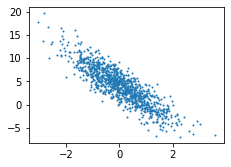

In [7]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5,2.5)):
    use_svg_display
    plt.rcParams['figure.figsize']=figsize
    
set_figsize()
plt.scatter(features[:,1].numpy(),labels.numpy(),1);

In [8]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j=torch.LongTensor(indices[i:min(i+batch_size,num_examples)])
        yield features.index_select(0,j),labels.index_select(0,j)

In [23]:
batch_size=10
for X,Y in data_iter(batch_size,features,labels):
    print(X,Y)
    break

tensor([[ 1.1209, -0.8144],
        [ 2.3668, -2.2114],
        [-0.6053,  1.1456],
        [-0.4063, -0.3190],
        [-1.0961, -0.9657],
        [-2.6301,  0.9083],
        [ 1.6448,  0.3083],
        [ 0.0088,  0.7260],
        [ 1.3893, -0.5791],
        [ 0.8172, -0.8460]], dtype=torch.float64) tensor([ 9.2070, 16.4732, -0.9088,  4.4730,  5.2947, -4.1341,  6.4373,  1.7518,
         8.9514,  8.7199], dtype=torch.float64)


In [32]:
w=torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.float64)
b=torch.zeros(1,dtype=torch.float64)

In [33]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], dtype=torch.float64, requires_grad=True)

In [34]:
def linreg(x,w,b):
    return torch.mm(x,w)+b

In [35]:
def squared_loss(y_hat,y):
    return (y_hat-y.view(y_hat.size()))**2/2

In [36]:
def sgd(params,lr,batch_size):
    for param in params:
        param.data-=lr*param.grad/batch_size

In [38]:
lr=0.03
epochs=5
net=linreg
loss=squared_loss

for epoch in range(epochs):
    for X,Y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),Y).sum()
        l.backward()
        sgd([w,b],lr,batch_size)
        
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l=loss(net(features,w,b),labels)
    print('epoch %d ,loss %f' % (epoch+1,train_l.mean().item()))

epoch 1 ,loss 0.000143
epoch 2 ,loss 0.000047
epoch 3 ,loss 0.000046
epoch 4 ,loss 0.000046
epoch 5 ,loss 0.000046


In [39]:
print(true_w,w)
print(true_b,b)

[2, -3.4] tensor([[ 1.9989],
        [-3.4002]], dtype=torch.float64, requires_grad=True)
4.2 tensor([4.2006], dtype=torch.float64, requires_grad=True)
